In [ ]:
# Typically Involves Scaling, Normalization, Vectorizing, Imputation, Encoding

In [1]:
import ipykernel

%pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

 SCALARS - Normal, Standard, Min-Max, Robust

STANDARD - 
WHAT - Just a special case of Normalization
Meu = 0, SD = 1 | Calcualtion using z-score formula

WHEN/WHY - When we want to compare/combine with others, but others are being measured on different scales. 

Assumes data is NORMALLY DISTRIBUTED within the feature. Thus CAN'T BE APPlIED ON ANY DATA JUST LIKE THAT. Otherwise no good for randomly distributed data.
Usually, works best on Unsupervised Algos. Also if the feature contains extremely High or Low values. \

Otherwise, Use Normalizer.

WHEN AVOID - When the Algo is not scale-sensitive, like RF, Decisiton Tree, Non-Linear Algos like NN, SVM, etc.

In [3]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 1, 10000),
    'x2': np.random.normal(10, 5, 10000),
    'x3': np.random.normal(50, 10, 10000)
})

In [4]:
df.head(1)

,x1,x2,x3
0,-0.02731,8.198919,58.2453


In [6]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.004086,9.974176,50.138429
std,1.002831,4.978518,9.938017
min,-3.827073,-10.910753,6.609068
25%,-0.688541,6.555010,43.373660
50%,-0.003846,9.946465,50.009903
75%,0.690050,13.290939,56.831293
max,4.360732,27.755832,88.381718


<AxesSubplot:ylabel='Density'>

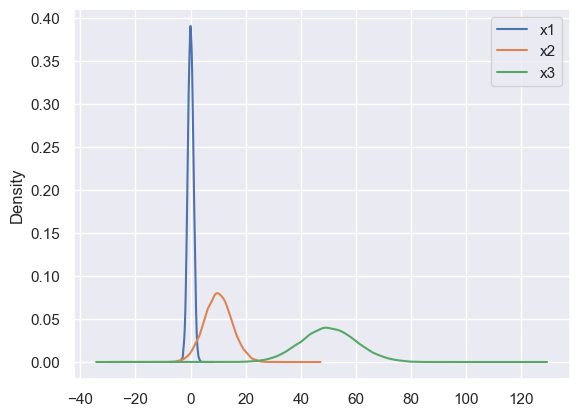

In [5]:
# plotting data
df.plot.kde()

In [7]:
#HOW - 
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [9]:
std_df = standardscaler.fit_transform(df)

In [10]:
df = pd.DataFrame(std_df, columns=['x1','x2','x3'])

In [11]:
df.head(1)

,x1,x2,x3
0,-0.031309,-0.356601,0.815784


In [12]:
df.describe()

,x1,x2,x3
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.222356e-17,7.863710e-17,-4.803158e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.820532e+00,-4.195219e+00,-4.380304e+00
25%,-6.907053e-01,-6.868182e-01,-6.807301e-01
50%,-7.909725e-03,-5.566483e-03,-1.293338e-02
75%,6.840618e-01,6.662483e-01,6.734944e-01
max,4.344563e+00,3.571855e+00,3.848374e+00


<AxesSubplot:ylabel='Density'>

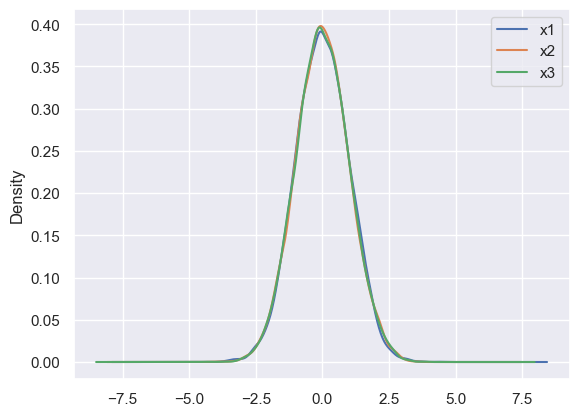

In [13]:
df.plot.kde()

2. NORMALIZER - 
WHAT - Typically in [-1,1] or [0,1]
Centralizes data to the origin\

WHY - May lead to increased speed of learning
Aviod Domination by the IMP feature during Gradient Descent

In [14]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-20, 80, 1000).astype(float),
    'z1': np.random.randint(-50, 150, 1000).astype(float),
})

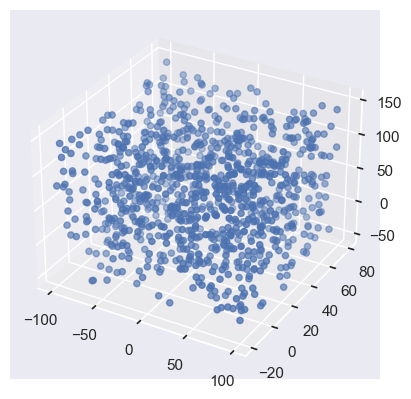

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [16]:
from sklearn.preprocessing import Normalizer

In [17]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [18]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

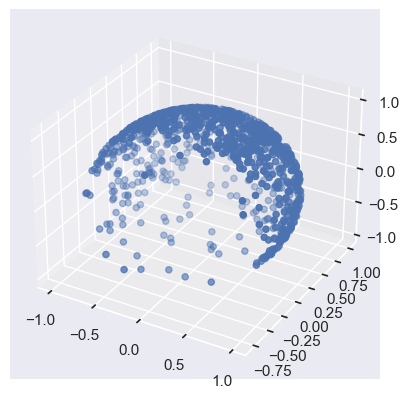

In [19]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

3. Binarization

Thresholds Numerical values to 0 or 1. 

In [20]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [21]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [22]:
data_tf = binarizer.fit_transform(X)

In [23]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

4. Encoding Categorical Values
Label Encoding with right mapping.

Following is case of encoding Ordinal Values

In [24]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [25]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [26]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

Encoding Nominal Vaues using ONE HOT ENCODER

In [27]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22,35],
    'Gender':['Male','Female','Male','Female','Male','Male','LGBTQ']})

In [28]:
df.Gender.unique()

array(['Male', 'Female', 'LGBTQ'], dtype=object)

In [29]:
print(pd.get_dummies(df.Gender))

   Female  LGBTQ  Male
0       0      0     1
1       1      0     0
2       0      0     1
3       1      0     0
4       0      0     1
5       0      0     1
6       0      1     0


In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [31]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [32]:
df

,Age,Gender,gender_tf
0,33,Male,2
1,44,Female,0
2,22,Male,2
3,44,Female,0
4,55,Male,2
5,22,Male,2
6,35,LGBTQ,1


In [33]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [34]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [35]:
df['Income_label'] = le.fit_transform(df.Income)

In [36]:
df

,Age,Income,Income_label
0,33,Low,1
1,44,Low,1
2,22,High,0
3,44,Medium,2
4,55,Medium,2
5,22,High,0


IMPUTATION - TO TREAT MISSING VALUES

In [37]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [39]:
df_copy = imputer.fit_transform(df)

In [40]:
df_copy

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

CUSTOM TRANFORMER - To convert a useful funciton of preprocessing into a Transformer
validate = False is required for string columns`

In [41]:
from sklearn.preprocessing import FunctionTransformer

In [42]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [43]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [44]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [45]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4
